# Analising General Ratings

In [112]:
import pandas as pd
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [113]:
ratings.shape

(100836, 4)

In [114]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [115]:
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [116]:
print("Mean -", ratings['rating'].mean())
print("Median -", ratings['rating'].median())

Mean - 3.501556983616962
Median - 3.5


In [117]:
ratings.rating

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

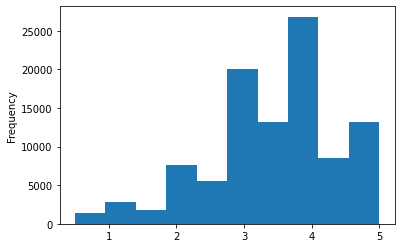

In [118]:
ratings.rating.plot(kind='hist')

In [119]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [120]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


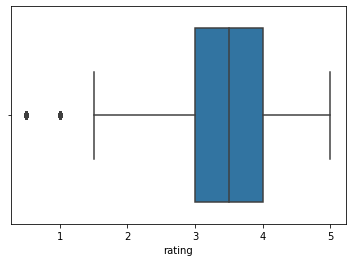

In [121]:
sns.boxplot(ratings.rating)

# Analising specific movie ratings

In [122]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [123]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [124]:
ratings.query("movieId==1").rating.mean()

3.9209302325581397

In [125]:
ratings.query("movieId==2").rating.mean()

3.4318181818181817

In [126]:
mean_per_movie = ratings.groupby("movieId").mean()["rating"]
mean_per_movie.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

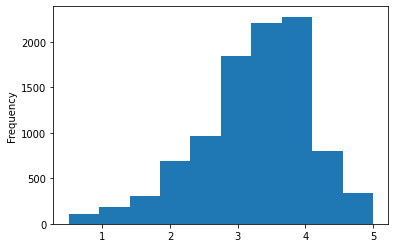

In [127]:
mean_per_movie.plot(kind='hist')

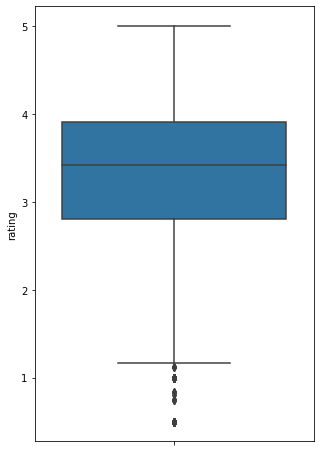

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=mean_per_movie)

In [129]:
mean_per_movie.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


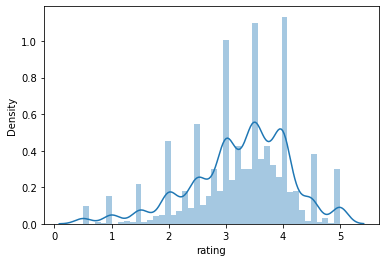

In [130]:
sns.distplot(mean_per_movie)

Text(0.5, 1.0, 'Histogram of movies mean')

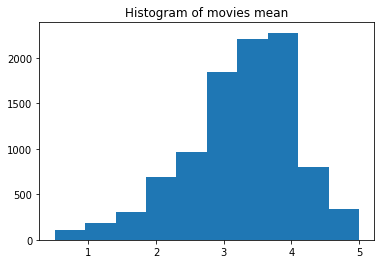

In [131]:
plt.hist(mean_per_movie)
plt.title("Histogram of movies mean")

In [132]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [133]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [134]:
language_count = tmdb["original_language"].value_counts().to_frame().reset_index()
language_count.columns = ["original_language", "total"]
language_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


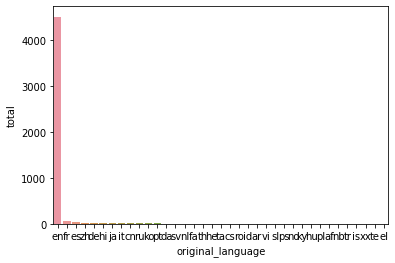

In [135]:
sns.barplot(x="original_language", y="total", data = language_count)

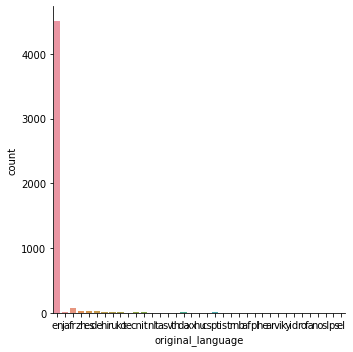

In [136]:
sns.catplot(x="original_language", kind="count", data= tmdb)

In [137]:
total_per_language = tmdb["original_language"].value_counts()
general_total = total_per_language.sum()
english_total = total_per_language.loc["en"]
other_languages_total = general_total - english_total
print(english_total, other_languages_total)

4505 298


In [138]:
data = {
    'language': ['english', 'others'],
    'total': [english_total, other_languages_total]
}
data

{'language': ['english', 'others'], 'total': [4505, 298]}

In [139]:
pd.DataFrame(data)

,language,total
0,english,4505
1,others,298


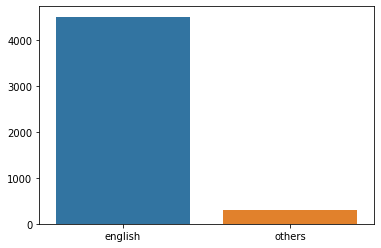

In [140]:
sns.barplot(x="language", y="total", data= data)

In [141]:
other_movies_total_language = tmdb.query("original_language != 'en'").original_language.value_counts()
other_movies_total_language

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

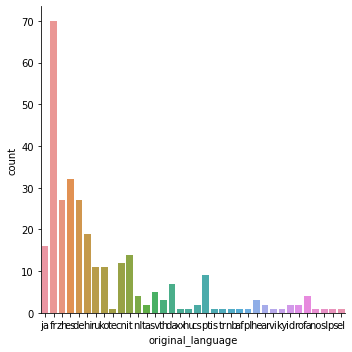

In [142]:
other_language_movies = tmdb.query("original_language != 'en'")

sns.catplot(x="original_language", kind="count", data= other_language_movies)

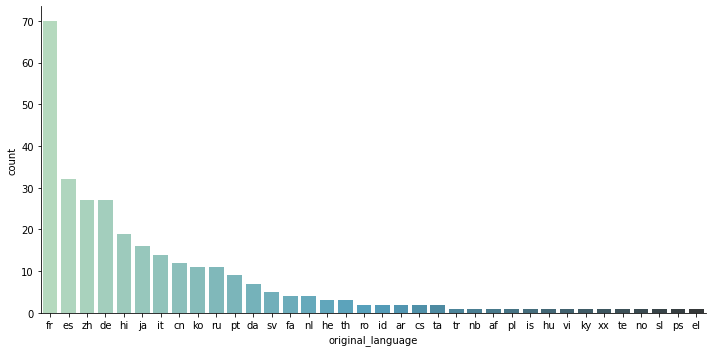

In [144]:
other_language_movies = tmdb.query("original_language != 'en'")

sns.catplot(x="original_language", kind="count", data= other_language_movies, 
            aspect = 2, order = other_movies_total_language.index,
            palette = "GnBu_d")

# Reviewing mean, median, central tendency, standard deviation, boxplot, histogram... 

In [145]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [148]:
toy_story_ratings = ratings.query("movieId==1")
jumanji_ratings = ratings.query("movieId==2")
print(len(toy_story_ratings), len(jumanji_ratings))

215 110


In [153]:
print("Toy Story mean rating %.2f" % toy_story_ratings["rating"].mean())
print("Jumanji mean rating %.2f" % jumanji_ratings["rating"].mean())

Toy Story mean rating 3.92
Jumanji mean rating 3.43


In [154]:
import numpy as np

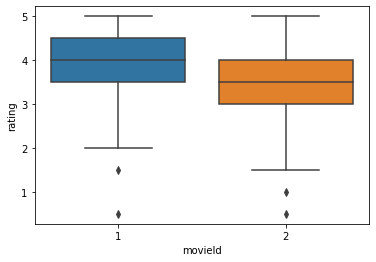

In [156]:
sns.boxplot(x = "movieId", y = "rating", data = ratings.query("movieId in [1,2]"))

In [164]:
print("Jumanji Standard Deviation - %.2f" % jumanji_ratings["rating"].std())
print("Toy Story Standard Deviation - %.2f" % toy_story_ratings["rating"].std())

Jumanji Standard Deviation - 0.88
Toy Story Standard Deviation - 0.83
